In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import make_interp_spline

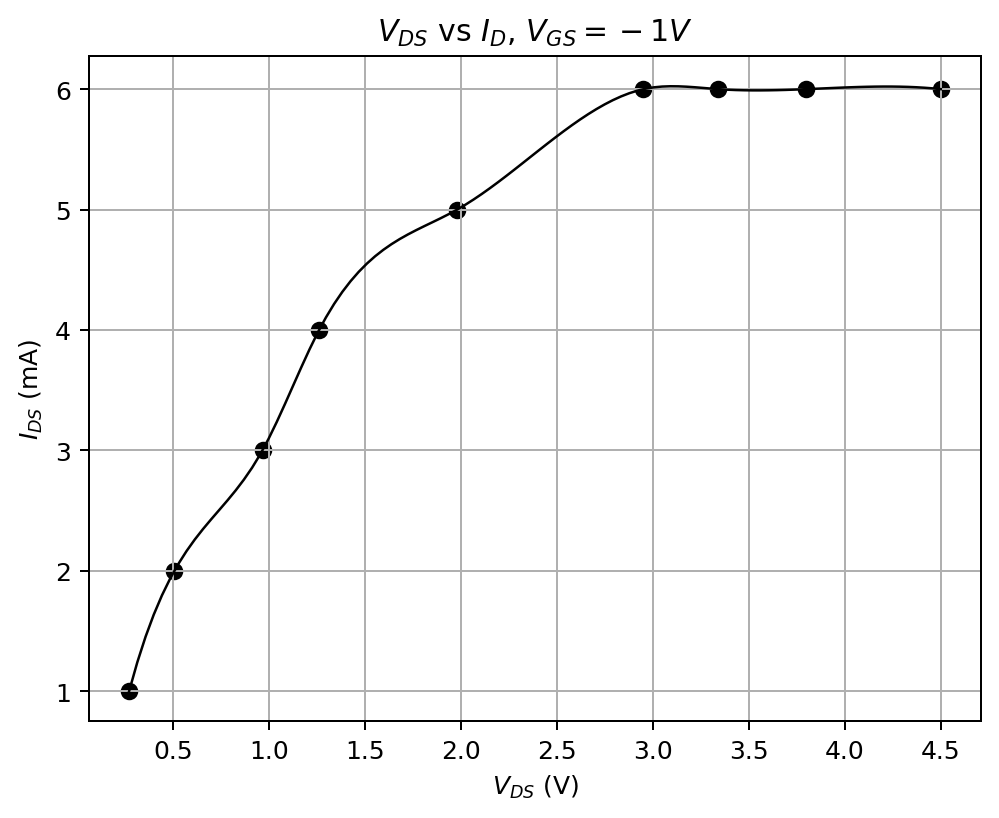

In [70]:
df = pd.read_csv('ip.csv')

fig, ax = plt.subplots(1,1,dpi=180)
ax.set_xlabel(r'$V_{DS}$ (V)')
ax.set_ylabel(r'$I_{DS}$ (mA)')
ax.set_title(r'$V_{DS}$ vs $I_{D}$, $V_{GS} = -1V$')
ax.grid()
x_clean = df['vgs0'].dropna()
y_clean = df['igs0'].dropna()
X_Y_Spline = make_interp_spline(x_clean, y_clean)
x = np.linspace(df['vgs0'].min(), df['vgs0'].max(), 100)
y = X_Y_Spline(x)
ax.set_xticks(np.linspace(0,5,11))
ax.plot(x,y, linewidth=1, color='k')
ax.scatter(df['vgs0'], df['igs0'], color='k', marker='o')
fig.savefig('vgs0.jpeg')
plt.show()
plt.close()

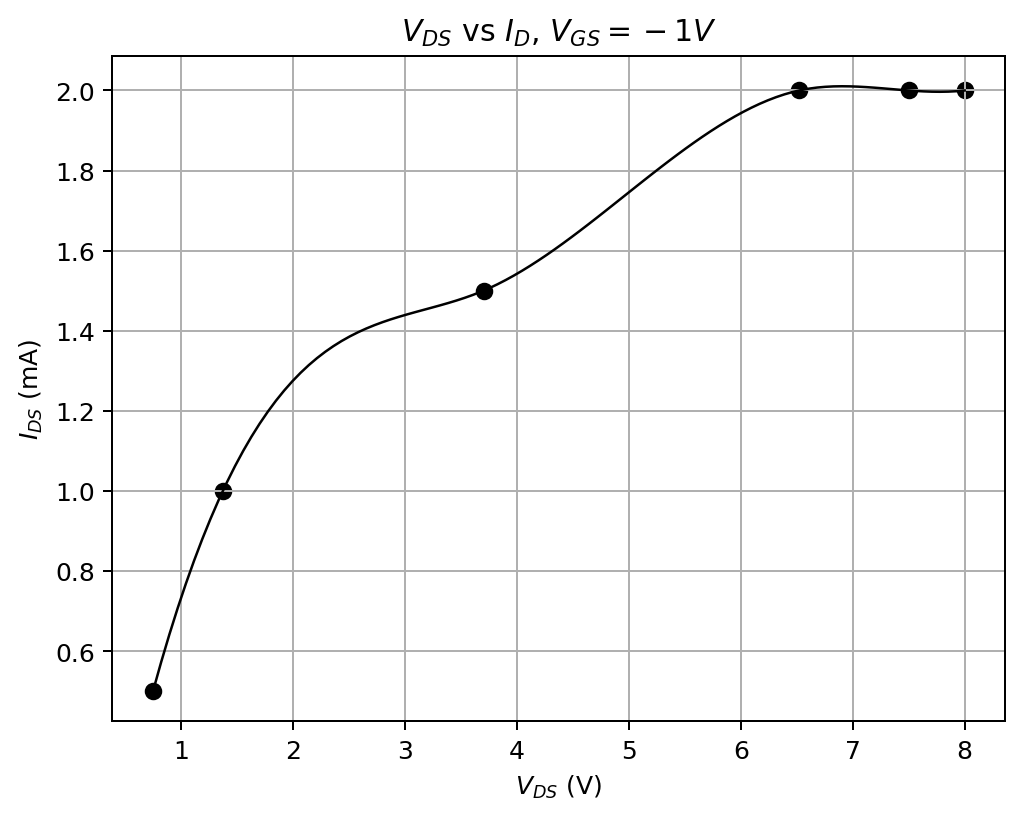

In [84]:
fig, ax = plt.subplots(1,1,dpi=180)
ax.set_xlabel(r'$V_{DS}$ (V)')
ax.set_ylabel(r'$I_{DS}$ (mA)')
ax.set_title(r'$V_{DS}$ vs $I_{D}$, $V_{GS} = -1V$')
ax.grid()
x_clean = df['vgs1'].dropna()
y_clean = df['igs1'].dropna()
X_Y_Spline = make_interp_spline(x_clean, y_clean)
x = np.linspace(df['vgs1'].min(), df['vgs1'].max(), 100)
y = X_Y_Spline(x)
ax.set_xticks(np.linspace(0,8,9))
ax.plot(x,y, linewidth=1, color='k')
ax.scatter(df['vgs1'], df['igs1'], color='k', marker='o')
fig.savefig('vgs1.jpeg')
plt.show()
plt.close()

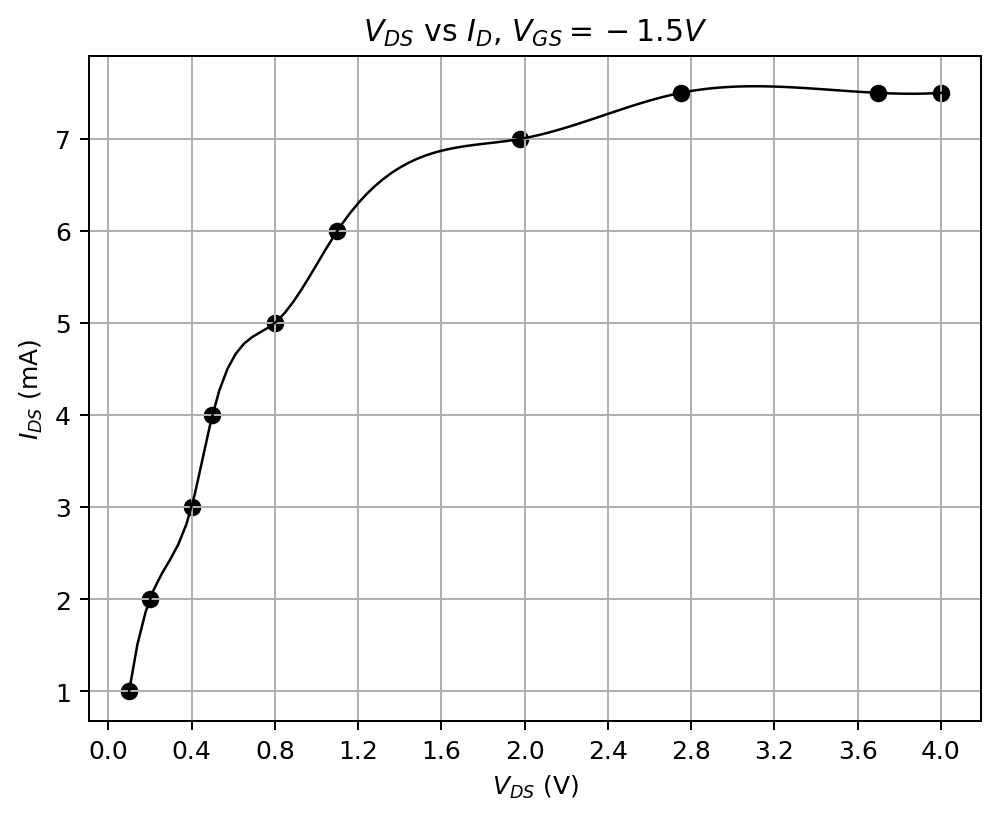

In [79]:
fig, ax = plt.subplots(1,1,dpi=180)
ax.set_xlabel(r'$V_{DS}$ (V)')
ax.set_ylabel(r'$I_{DS}$ (mA)')
ax.set_title(r'$V_{DS}$ vs $I_{D}$, $V_{GS} = -1.5V$')
ax.grid()
x_clean = df['vgs15'].dropna()
y_clean = df['igs15'].dropna()
X_Y_Spline = make_interp_spline(x_clean, y_clean)
x = np.linspace(df['vgs15'].min(), df['vgs15'].max(), 100)
y = X_Y_Spline(x)
ax.set_xticks(np.linspace(0,4,11))
ax.set_yticks(np.linspace(0,8,9))
ax.plot(x,y, linewidth=1, color='k')
ax.scatter(df['vgs15'], df['igs15'], color='k', marker='o')
fig.savefig('vgs15.jpeg')
plt.show()
plt.close()